In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./oil and gas.csv")

In [3]:
df.head()

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,2000-01-04,23.90,24.70,23.89,24.39,32509,USD
1,Brent Oil,2000-01-05,24.25,24.37,23.70,23.73,30310,USD
2,Brent Oil,2000-01-06,23.55,24.22,23.35,23.62,44662,USD
3,Brent Oil,2000-01-07,23.57,23.98,23.05,23.09,34826,USD
4,Brent Oil,2000-01-10,23.04,23.78,23.04,23.73,26388,USD


In [4]:
df['Symbol'].unique()

array(['Brent Oil', 'Crude Oil WTI', 'Natural Gas', 'Heating Oil'],
      dtype=object)

In [5]:
df['Symbol'].value_counts()

Heating Oil      5770
Brent Oil        5768
Crude Oil WTI    5744
Natural Gas      5742
Name: Symbol, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23024 entries, 0 to 23023
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Symbol    23024 non-null  object 
 1   Date      23024 non-null  object 
 2   Open      23024 non-null  float64
 3   High      23024 non-null  float64
 4   Low       23024 non-null  float64
 5   Close     23024 non-null  float64
 6   Volume    23024 non-null  int64  
 7   Currency  23024 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,2000-01-04,23.90,24.70,23.89,24.39,32509,USD
1,Brent Oil,2000-01-05,24.25,24.37,23.70,23.73,30310,USD
2,Brent Oil,2000-01-06,23.55,24.22,23.35,23.62,44662,USD
3,Brent Oil,2000-01-07,23.57,23.98,23.05,23.09,34826,USD
4,Brent Oil,2000-01-10,23.04,23.78,23.04,23.73,26388,USD


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.set_index('Date', inplace=True)
monthly_volume = df['Volume'].resample('M').sum()

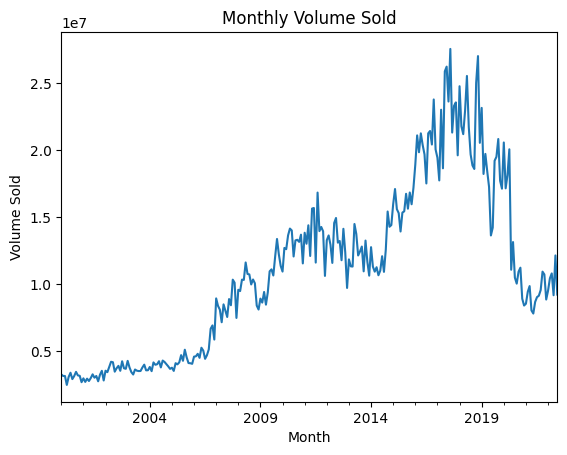

In [15]:
monthly_volume.plot()
plt.xlabel('Month')
plt.ylabel('Volume Sold')
plt.title('Monthly Volume Sold')
plt.show()

In [16]:
from pandas_profiling import ProfileReport
report = ProfileReport(df)
report.to_file('report.html')

/Users/maverick/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/pc/9c01j4c97lj6kf65dsrjqm0w0000gn/T/ipykernel_56035/2581189073.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
Summarize dataset:  57%|█████▋    | 8/14 [00:00<00:01,  5.70it/s, Calculate auto correlation]/Users/maverick/Library/Python/3.9/lib/python/site-packages/multimethod/__init__.py:315: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  return func(*args, **kwargs)
/Users/maverick/Library/Python/3.9/lib/python/site-packages/pandas_profiling/model/correlations.py:67: UserWarning: There was an attempt to calculate the auto corre

In [17]:
df.drop(columns=['Currency'], inplace=True)

In [18]:
df

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2000-01-04,Brent Oil,23.9000,24.7000,23.8900,24.3900,32509
2000-01-05,Brent Oil,24.2500,24.3700,23.7000,23.7300,30310
2000-01-06,Brent Oil,23.5500,24.2200,23.3500,23.6200,44662
2000-01-07,Brent Oil,23.5700,23.9800,23.0500,23.0900,34826
2000-01-10,Brent Oil,23.0400,23.7800,23.0400,23.7300,26388
...,...,...,...,...,...,...
2022-06-13,Heating Oil,4.3612,4.3762,4.1949,4.2834,46406
2022-06-14,Heating Oil,4.2749,4.4570,4.2488,4.3940,36652
2022-06-15,Heating Oil,4.3816,4.6070,4.3557,4.5470,36908


In [20]:
df = df[df['Volume'] != 0]

In [29]:
df[:1]

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2000-01-04,Brent Oil,23.9,24.7,23.89,24.39,32509


In [30]:
df = df.reset_index()

In [31]:
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2000-01-04,Brent Oil,23.9000,24.7000,23.8900,24.3900,32509
1,2000-01-05,Brent Oil,24.2500,24.3700,23.7000,23.7300,30310
2,2000-01-06,Brent Oil,23.5500,24.2200,23.3500,23.6200,44662
3,2000-01-07,Brent Oil,23.5700,23.9800,23.0500,23.0900,34826
4,2000-01-10,Brent Oil,23.0400,23.7800,23.0400,23.7300,26388
...,...,...,...,...,...,...,...
22655,2022-06-10,Heating Oil,4.4187,4.5135,4.3155,4.3667,38656
22656,2022-06-13,Heating Oil,4.3612,4.3762,4.1949,4.2834,46406
22657,2022-06-14,Heating Oil,4.2749,4.4570,4.2488,4.3940,36652
22658,2022-06-15,Heating Oil,4.3816,4.6070,4.3557,4.5470,36908


In [33]:
companies = df['Symbol'].unique()

In [34]:
companies

array(['Brent Oil', 'Crude Oil WTI', 'Natural Gas', 'Heating Oil'],
      dtype=object)

In [35]:
datasets = {}
for company in companies:
    datasets[company] = df[df['Symbol'] == company]

In [38]:
datasets['Brent Oil'] = datasets['Brent Oil'].drop(columns=['Symbol'])

In [39]:
datasets['Brent Oil']

,Date,Open,High,Low,Close,Volume
0,2000-01-04,23.90,24.70,23.89,24.39,32509
1,2000-01-05,24.25,24.37,23.70,23.73,30310
2,2000-01-06,23.55,24.22,23.35,23.62,44662
3,2000-01-07,23.57,23.98,23.05,23.09,34826
4,2000-01-10,23.04,23.78,23.04,23.73,26388
...,...,...,...,...,...,...
5759,2022-06-13,121.94,123.70,118.93,122.27,257105
5760,2022-06-14,121.88,125.19,118.91,121.17,291264
5761,2022-06-15,120.79,121.88,117.75,118.51,231061
5762,2022-06-16,119.65,120.29,115.56,119.81,276675


In [40]:
datasets['Crude Oil WTI'] = datasets['Crude Oil WTI'].drop(columns=['Symbol'])
datasets['Natural Gas'] = datasets['Natural Gas'].drop(columns=['Symbol'])
datasets['Heating Oil'] = datasets['Heating Oil'].drop(columns=['Symbol'])

In [41]:
datasets['Brent Oil'].to_csv('brent.csv', index=False)
datasets['Crude Oil WTI'].to_csv('crude.csv', index=False)
datasets['Natural Gas'].to_csv('natural.csv', index=False)
datasets['Heating Oil'].to_csv('heating.csv', index=False)